In [14]:
# pip install --upgrade mplfinance
# pip install yfinance
# pip install PyPortfolioOpt
# pip install --upgrade matplotlib

In [34]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns

In [37]:
user_data = pd.read_csv('test.csv')
user_stocks = user_data['Stock'].tolist()

[*********************100%***********************]  1 of 1 completed


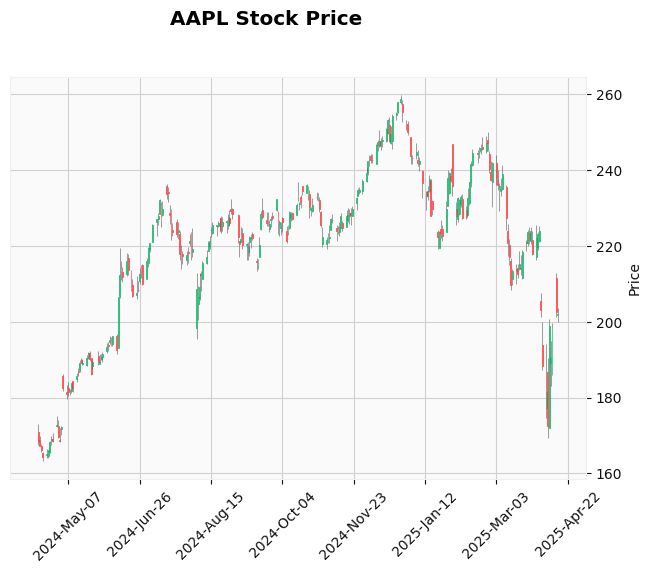

In [38]:
# historical data for specific ticker
def get_historical_data(ticker):
    stock_data = yf.download(ticker, start="2024-04-16", end="2025-04-16", group_by="ticker")
    if isinstance(stock_data.columns, pd.MultiIndex):
        stock_data.columns = stock_data.columns.droplevel(0)
    return stock_data

stock = input('What ticker are you interested in seeing historical data for?').upper()

curr_stock = get_historical_data(stock)

expected_cols = ["Open", "High", "Low", "Close"]


curr_stock = curr_stock.dropna(subset=expected_cols)
mpf.plot(curr_stock, type="candle", volume=False, show_nontrading=True, 
         title=f"{stock} Stock Price", style="yahoo")


In [39]:
# stock efficiency 
data = yf.download(user_stocks, period="1y")["Adj Close"]
returns = expected_returns.mean_historical_return(data)
cov_matrix = risk_models.sample_cov(data)

ef = EfficientFrontier(returns, cov_matrix)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

print(ef)
print(weights)
print(cleaned_weights)

TypeError: expected string or bytes-like object